# Attention Neural Networks

In [1]:
from random import randint
import numpy as np
import pandas as pd
import tensorflow.keras.models as tkm
import tensorflow.keras.layers as tkl
import tensorflow.keras.utils as tku

![](attention1.png)
![](attention2.png)

### Data preparation

Generate a sequence of random integers, do one-hot encoding/decoding and reshape 3D for LSTM

In [52]:
def gen_seq(length, n_unique):
    return [randint(0, n_unique-1) for _ in range(length)]

def one_hot_encode(seq, n_unique):
    encoding = list()
    for value in seq:
        vector = [0 for _ in range(n_unique)]
        vector[value] = 1
        encoding.append(vector)
    return np.array(encoding)

def one_hot_decode(encoded_seq):
    return [np.argmax(vector) for vector in encoded_seq]

def get_pair(n_in, n_out, cardinality):
    seq_in = gen_seq(n_in, cardinality)
    seq_out = seq_in[:n_out] + [0 for _ in range(n_in - n_out)]
    
    X = one_hot_encode(seq_in, cardinality)
    y = one_hot_encode(seq_out, cardinality)
    
    X = X.reshape((1, X.shape[0], X.shape[1]))
    y = y.reshape((1, y.shape[0], y.shape[1]))
    return X,y

### Build LSTM

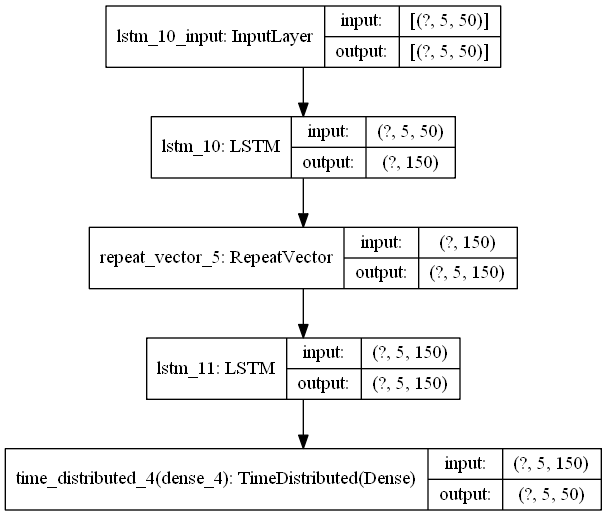

In [53]:
n_feat = 50
n_steps_in = 5
n_steps_out = 2

model = tkm.Sequential()
model.add(tkl.LSTM(150, input_shape=(n_steps_in, n_feat)))
model.add(tkl.RepeatVector(n_steps_in))
model.add(tkl.LSTM(150, return_sequences=True))
model.add(tkl.TimeDistributed(tkl.Dense(n_feat, activation='softmax')))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
tku.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Train LSTM

In [54]:
epochs = 5000
for epoch in range(epochs):
    X,y = get_pair(n_steps_in, n_steps_out, n_feat)
    model.fit(X, y, epochs=1, verbose=1)
    total, hits = 100, 0
    
for _ in range(total):
    X,y = get_pair(n_steps_in, n_steps_out, n_feat)
    pred = model.predict(X, verbose=0)
    if np.array_equal(one_hot_decode(y[0]), one_hot_decode(pred[0])): hits += 1
        
print('Accuracy: ', '{:.2f}'.format(float(hits)/float(total)*100.0))

1/1 [==============================] - 0s 1ms/step - loss: 0.6235 - accuracy: 0.8000
Accuracy:  25.00


### Testing

In [47]:
Pred = []; Real = []
for _ in range(10):
    X,y = get_pair(n_timesteps_in, n_timesteps_out, n_features)
    pred = model.predict(X, verbose=0)
    Pred.append(one_hot_decode(pred[0]))
    Real.append(one_hot_decode(y[0]))
    
Real_df = pd.DataFrame(Real)
Real_df.columns = ['r'+str(i) for i in range(1,6)]
Pred_df = pd.DataFrame(Pred)
Pred_df.columns = ['p'+str(i) for i in range(1,6)]
Pred_df
pd.concat([Pred_df, Real_df], axis=1)

,p1,p2,p3,p4,p5,r1,r2,r3,r4,r5
0,17,17,0,0,0,14,17,0,0,0
1,6,6,0,0,0,6,21,0,0,0
2,25,25,0,0,0,25,38,0,0,0
3,24,24,0,0,0,24,45,0,0,0
4,7,7,0,0,0,7,10,0,0,0
5,45,12,0,0,0,45,12,0,0,0
6,40,40,0,0,0,40,48,0,0,0
7,30,6,0,0,0,30,13,0,0,0
8,42,42,0,0,0,42,23,0,0,0
9,36,36,0,0,0,36,36,0,0,0


### Credits & Links

https://machinelearningmastery.com/encoder-decoder-attention-sequence-to-sequence-prediction-keras/